In [9]:
import pandas as pd
import numpy as np
import helpers as hp

import seaborn as sns
from matplotlib import pyplot as plt

from starbucks import StarBucksBase

In [10]:
portfolio_path = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_path = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_path = pd.read_json('data/transcript.json', orient='records', lines=True)
starbucks = StarBucksBase(portfolio_path, profile_path, transcript_path)

# portfolio_path = pd.read_csv('data/preprocessed_portfolio.csv')
# profile_path = pd.read_csv('data/preprocessed_profile.csv')
# transcript_path = pd.read_csv('data/preprocessed_transcripts.csv')
# starbucks = StarBucksBase(portfolio_path, profile_path, transcript_path, preprocessing_required=False)
# starbucks.succ_tried_offers = pd.read_csv('data/preprocessed_succ_tried_offers.csv')

C:\Users\Admin\Documents\Data Scientist Nanodegree\data-scientist-nanodegree\P7. Capstone Project\starbucks.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.profile['income_group'] = self.profile['income'].apply(self.__create_income_group)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to b

In [26]:
starbucks.portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,BOGO/C10/R10/T7
1,10,"[web, email, mobile, social]",10,5,bogo,BOGO/C10/R10/T5
2,0,"[web, email, mobile]",0,4,informational,INFORMATIONAL/C0/R0/T4
3,5,"[web, email, mobile]",5,7,bogo,BOGO/C5/R5/T7
4,5,"[web, email]",20,10,discount,DISCOUNT/C20/R5/T10


In [4]:
starbucks.portfolio.to_csv('data/preprocessed_portfolio.csv', index=False)

In [27]:
starbucks.profile.head()

,gender,age,person,income,member_year,member_since_days,age_group,income_group
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,since_3_year,3.0,6.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,since_3_year,4.0,5.0
5,M,68.0,e2127556f4f64592b11af22de27a7932,70000.0,2018,since_3_year,3.0,3.0
8,M,65.0,389bc3fa690240e798340f5a15918d5c,53000.0,2018,since_3_year,3.0,2.0
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,since_3_year,3.0,2.0


In [6]:
starbucks.profile.to_csv('data/preprocessed_profile.csv', index=False)

In [28]:
starbucks.transcript.head()

,person,event,value,time,type,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer_id,BOGO/C5/R5/T7
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer_id,DISCOUNT/C20/R5/T10
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer_id,DISCOUNT/C10/R2/T7
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer_id,DISCOUNT/C10/R2/T10
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer_id,BOGO/C10/R10/T5


In [8]:
starbucks.transcript.to_csv('data/preprocessed_transcripts.csv', index=False)

In [30]:
starbucks.succ_tried_offers.head()

,person,value,time_received,type,offer_id,gender,age,income,member_year,member_since_days,...,offer_type,time_viewed,time_completed,time_of_expiry,successful_offer,tried_offer,failed_offer,time_spent,amount_spent,spent_during_offer
10,102e9454054946fda62242d2e176fdce,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,offer_id,BOGO/C10/R10/T5,F,69.0,57000.0,2016.0,since_3_year,...,bogo,0.0,6.0,7.0,1,0,0,6.0,19.88,1
24,02c083884c7d45b39cc68e1314fec56c,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0.0,offer_id,BOGO/C10/R10/T7,F,20.0,30000.0,2016.0,since_4_year,...,bogo,0.0,NaN,7.0,0,1,0,0.0,0.83,1
25,02c083884c7d45b39cc68e1314fec56c,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0.0,offer_id,BOGO/C10/R10/T7,F,20.0,30000.0,2016.0,since_4_year,...,bogo,0.0,NaN,7.0,0,1,0,6.0,1.44,1
34,be8a5d1981a2458d90b255ddc7e0d174,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0.0,offer_id,INFORMATIONAL/C0/R0/T3,M,39.0,51000.0,2014.0,since_6_year,...,informational,0.0,NaN,7.0,0,1,0,6.0,2.63,1
52,676506bad68e4161b9bbaffeb039626b,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0.0,offer_id,BOGO/C10/R10/T7,M,37.0,92000.0,2017.0,since_3_year,...,bogo,0.0,0.0,5.0,1,0,0,0.0,18.01,1


In [10]:
starbucks.succ_tried_offers.to_csv('data/preprocessed_succ_tried_offers.csv', index=False)

In [3]:
starbucks.succ_tried_offers.columns

Index(['person', 'value', 'time_received', 'type', 'offer_id', 'gender', 'age',
       'income', 'member_year', 'member_since_days', 'age_group',
       'income_group', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'time_viewed', 'time_completed', 'time_of_expiry',
       'successful_offer', 'tried_offer', 'failed_offer', 'time_spent',
       'amount_spent', 'spent_during_offer'],
      dtype='object')

In [11]:
total_tried_offers = starbucks.succ_tried_offers.copy()

In [12]:
failed_offers = starbucks.succ_tried_offers[starbucks.succ_tried_offers['spent_during_offer']==0]

In [13]:
starbucks.succ_tried_offers = starbucks.succ_tried_offers[starbucks.succ_tried_offers['spent_during_offer']==1]

In [15]:
starbucks.succ_tried_offers.shape

(25277, 26)

In [4]:
X_train, X_test, y_train, y_test = starbucks.create_test_and_train()

C:\Users\Admin\Documents\Data Scientist Nanodegree\data-scientist-nanodegree\P7. Capstone Project\helpers.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix + val] = df[col].apply(lambda x: 1 if val in x else 0)


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20221, 21), (5056, 21), (20221,), (5056,))

In [6]:
starbucks.succ_tried_offers.shape

(25277, 26)

In [7]:
starbucks.train_model(X_train, y_train, save_path="models/svr_model.sav")

SVR model trained on 7-degree poly kernel


In [8]:
starbucks.model_predict(X_test, y_test, 'SVR')

SVR Model R2 score:  0.041794040197025595


In [9]:
starbucks.train_model(X_train, y_train, save_path="models/rf_model.sav", model_type='rf')

RF Model trained with 100 estimators


In [10]:
starbucks.model_predict(X_test, y_test, 'RF')

RF Model R2 score:  -0.008060879289752076


In [11]:
starbucks.train_model(X_train, y_train, save_path="models/finalized_model.sav", model_type='gcv')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=10, score=0.053, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=10, score=0.036, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=10, score=0.054, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=10, score=0.072, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=10, score=0.056, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=50, score=0.052, total=   0.3s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=50, score=0.034, total=   0.2s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=50, score=0.049, total=   0.2s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=50, score=0.058, total=   0.2s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=50, score=0.048, total=   0.2s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=100, score=0.049, total=   0.5s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=100, score=0.033, total=   0.4s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=100, score=0.046, total=   0.4s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=100, score=0.054, total=   0.5s
[CV] max_depth=5, max_features=1, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=3, n_estimators=100, score=0.045, total=   0.4s
[CV] max_depth=5, max_features

[CV]  max_depth=5, max_features=1, min_samples_split=30, n_estimators=100, score=0.049, total=   0.5s
[CV] max_depth=5, max_features=1, min_samples_split=30, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=30, n_estimators=100, score=0.055, total=   0.4s
[CV] max_depth=5, max_features=1, min_samples_split=30, n_estimators=100 
[CV]  max_depth=5, max_features=1, min_samples_split=30, n_estimators=100, score=0.047, total=   0.4s
[CV] max_depth=5, max_features=1, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=50, n_estimators=10, score=0.057, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=50, n_estimators=10, score=0.036, total=   0.1s
[CV] max_depth=5, max_features=1, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, max_features=1, min_samples_split=50, n_estimators=10, score=0.056, total=   0.1s
[CV] max_depth=5, max_fe

[CV]  max_depth=5, max_features=3, min_samples_split=3, n_estimators=100, score=0.068, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=10, score=0.058, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=10, score=0.043, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=10, score=0.061, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=10, score=0.075, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=5, n_estimators=10, score=0.065, total=   0.1s
[CV] max_depth=5, max_features=3, min_s

[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=10, score=0.068, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=10, score=0.069, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=50, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=10, score=0.065, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_split=50, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=50, score=0.068, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_split=50, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=50, score=0.051, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_split=50, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_split=50, n_estimators=50, score=0.074, total=   0.3s
[CV] max_depth=5, max_feature

[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=50, score=0.073, total=   0.6s
[CV] max_depth=5, max_features=8, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=50, score=0.053, total=   0.6s
[CV] max_depth=5, max_features=8, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=50, score=0.055, total=   0.5s
[CV] max_depth=5, max_features=8, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=50, score=0.090, total=   0.5s
[CV] max_depth=5, max_features=8, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=50, score=0.079, total=   0.6s
[CV] max_depth=5, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=5, n_estimators=100, score=0.075, total=   1.2s
[CV] max_depth=5, max_features=8, min_

[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=50, score=0.090, total=   0.5s
[CV] max_depth=5, max_features=8, min_samples_split=50, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=50, score=0.081, total=   0.6s
[CV] max_depth=5, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=100, score=0.077, total=   1.3s
[CV] max_depth=5, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=100, score=0.056, total=   1.2s
[CV] max_depth=5, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=100, score=0.079, total=   1.1s
[CV] max_depth=5, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=50, n_estimators=100, score=0.091, total=   1.1s
[CV] max_depth=5, max

[CV]  max_depth=5, max_features=15, min_samples_split=5, n_estimators=100, score=0.073, total=   1.8s
[CV] max_depth=5, max_features=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=5, n_estimators=100, score=0.047, total=   2.0s
[CV] max_depth=5, max_features=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=5, n_estimators=100, score=0.036, total=   1.9s
[CV] max_depth=5, max_features=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=5, n_estimators=100, score=0.090, total=   2.0s
[CV] max_depth=5, max_features=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=5, n_estimators=100, score=0.067, total=   2.1s
[CV] max_depth=5, max_features=15, min_samples_split=10, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_split=10, n_estimators=10, score=0.069, total=   0.2s
[CV] max_depth=5, 

[CV]  max_depth=5, max_features=15, min_samples_split=50, n_estimators=100, score=0.075, total=   1.5s
[CV] max_depth=5, max_features=15, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=50, n_estimators=100, score=0.089, total=   1.9s
[CV] max_depth=5, max_features=15, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, max_features=15, min_samples_split=50, n_estimators=100, score=0.081, total=   1.8s
[CV] max_depth=5, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_split=100, n_estimators=10, score=0.076, total=   0.2s
[CV] max_depth=5, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_split=100, n_estimators=10, score=0.048, total=   0.2s
[CV] max_depth=5, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=5, max_features=15, min_samples_split=100, n_estimators=10, score=0.072, total=   0.2s
[CV] ma

[CV]  max_depth=10, max_features=1, min_samples_split=5, n_estimators=100, score=0.042, total=   0.7s
[CV] max_depth=10, max_features=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=10, n_estimators=10, score=0.023, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=10, n_estimators=10, score=0.034, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=10, n_estimators=10, score=0.045, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=10, n_estimators=10, score=0.071, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=10, n_estimators=10, score=0.030, total=   0.1s
[CV] max_depth=10,

[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=10, score=0.064, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=100, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=10, score=0.077, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=100, n_estimators=10 
[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=10, score=0.050, total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=50, score=0.072, total=   0.3s
[CV] max_depth=10, max_features=1, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=50, score=0.051, total=   0.3s
[CV] max_depth=10, max_features=1, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=1, min_samples_split=100, n_estimators=50, score=0.069, total=   0.3s
[CV] ma

[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=50, score=0.054, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=50, score=0.056, total=   0.6s
[CV] max_depth=10, max_features=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=50, score=0.061, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=50, score=0.095, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_split=10, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=50, score=0.054, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_split=10, n_estimators=100, score=0.051, total=   0.9s
[CV] max_depth=1

[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=50, score=0.073, total=   0.4s
[CV] max_depth=10, max_features=3, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=50, score=0.091, total=   0.4s
[CV] max_depth=10, max_features=3, min_samples_split=100, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=50, score=0.068, total=   0.4s
[CV] max_depth=10, max_features=3, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=100, score=0.077, total=   0.8s
[CV] max_depth=10, max_features=3, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=100, score=0.058, total=   0.8s
[CV] max_depth=10, max_features=3, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_split=100, n_estimators=100, score=0.073, total=   0.8s
[

[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=50, score=0.053, total=   0.8s
[CV] max_depth=10, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=100, score=0.040, total=   1.6s
[CV] max_depth=10, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=100, score=0.047, total=   1.6s
[CV] max_depth=10, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=100, score=0.042, total=   1.8s
[CV] max_depth=10, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=100, score=0.090, total=   1.7s
[CV] max_depth=10, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=10, n_estimators=100, score=0.056, total=   1.6s
[CV] max

[CV]  max_depth=10, max_features=8, min_samples_split=100, n_estimators=100, score=0.059, total=   1.4s
[CV] max_depth=10, max_features=8, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=100, n_estimators=100, score=0.078, total=   1.5s
[CV] max_depth=10, max_features=8, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=100, n_estimators=100, score=0.095, total=   1.4s
[CV] max_depth=10, max_features=8, min_samples_split=100, n_estimators=100 
[CV]  max_depth=10, max_features=8, min_samples_split=100, n_estimators=100, score=0.076, total=   1.4s
[CV] max_depth=10, max_features=15, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=3, n_estimators=10, score=-0.120, total=   0.3s
[CV] max_depth=10, max_features=15, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=3, n_estimators=10, score=-0.027, total=   0.3s
[C

[CV]  max_depth=10, max_features=15, min_samples_split=10, n_estimators=100, score=0.071, total=   2.5s
[CV] max_depth=10, max_features=15, min_samples_split=10, n_estimators=100 
[CV]  max_depth=10, max_features=15, min_samples_split=10, n_estimators=100, score=0.042, total=   2.6s
[CV] max_depth=10, max_features=15, min_samples_split=30, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=30, n_estimators=10, score=0.048, total=   0.3s
[CV] max_depth=10, max_features=15, min_samples_split=30, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=30, n_estimators=10, score=0.031, total=   0.2s
[CV] max_depth=10, max_features=15, min_samples_split=30, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=30, n_estimators=10, score=0.062, total=   0.3s
[CV] max_depth=10, max_features=15, min_samples_split=30, n_estimators=10 
[CV]  max_depth=10, max_features=15, min_samples_split=30, n_estimators=10, score=0.070, total=   0.2s
[CV]

[CV]  max_depth=10, max_features=15, min_samples_split=100, n_estimators=100, score=0.078, total=   2.4s
[CV] max_depth=30, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=3, n_estimators=10, score=-0.112, total=   0.2s
[CV] max_depth=30, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=3, n_estimators=10, score=-0.013, total=   0.2s
[CV] max_depth=30, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=3, n_estimators=10, score=-0.205, total=   0.2s
[CV] max_depth=30, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=3, n_estimators=10, score=-0.044, total=   0.2s
[CV] max_depth=30, max_features=1, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=3, n_estimators=10, score=-0.153, total=   0.2s
[CV] max_depth=30, m

[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=10, score=0.035, total=   0.1s
[CV] max_depth=30, max_features=1, min_samples_split=30, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=10, score=0.072, total=   0.1s
[CV] max_depth=30, max_features=1, min_samples_split=30, n_estimators=10 
[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=10, score=0.011, total=   0.1s
[CV] max_depth=30, max_features=1, min_samples_split=30, n_estimators=50 
[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=50, score=0.057, total=   0.4s
[CV] max_depth=30, max_features=1, min_samples_split=30, n_estimators=50 
[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=50, score=0.055, total=   0.5s
[CV] max_depth=30, max_features=1, min_samples_split=30, n_estimators=50 
[CV]  max_depth=30, max_features=1, min_samples_split=30, n_estimators=50, score=0.052, total=   0.6s
[CV] max_depth=30,

[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=3, n_estimators=50, score=-0.064, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=3, n_estimators=50, score=0.017, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=3, n_estimators=50, score=-0.129, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=3, n_estimators=50, score=-0.011, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=3, n_estimators=50, score=-0.090, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_spli

[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=50, score=0.064, total=   0.5s
[CV] max_depth=30, max_features=3, min_samples_split=30, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=50, score=0.089, total=   0.5s
[CV] max_depth=30, max_features=3, min_samples_split=30, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=50, score=0.059, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=100, score=0.065, total=   1.4s
[CV] max_depth=30, max_features=3, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=100, score=0.060, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_split=30, n_estimators=100, score=0.063, total=   1.1s
[CV] max_dep

[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=50, score=-0.065, total=   1.5s
[CV] max_depth=30, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=100, score=-0.069, total=   3.1s
[CV] max_depth=30, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=100, score=0.007, total=   2.9s
[CV] max_depth=30, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=100, score=-0.095, total=   2.9s
[CV] max_depth=30, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=100, score=-0.007, total=   3.0s
[CV] max_depth=30, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=3, n_estimators=100, score=-0.058, total=   2.9s
[CV] max_depth

[CV]  max_depth=30, max_features=8, min_samples_split=30, n_estimators=100, score=0.055, total=   1.9s
[CV] max_depth=30, max_features=8, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=30, n_estimators=100, score=0.070, total=   1.8s
[CV] max_depth=30, max_features=8, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=30, n_estimators=100, score=0.096, total=   2.0s
[CV] max_depth=30, max_features=8, min_samples_split=30, n_estimators=100 
[CV]  max_depth=30, max_features=8, min_samples_split=30, n_estimators=100, score=0.068, total=   2.0s
[CV] max_depth=30, max_features=8, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=8, min_samples_split=50, n_estimators=10, score=0.066, total=   0.2s
[CV] max_depth=30, max_features=8, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=8, min_samples_split=50, n_estimators=10, score=0.048, total=   0.2s
[CV] max_de

[CV]  max_depth=30, max_features=15, min_samples_split=3, n_estimators=100, score=-0.026, total=   4.5s
[CV] max_depth=30, max_features=15, min_samples_split=3, n_estimators=100 
[CV]  max_depth=30, max_features=15, min_samples_split=3, n_estimators=100, score=-0.061, total=   4.8s
[CV] max_depth=30, max_features=15, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=5, n_estimators=10, score=-0.168, total=   0.4s
[CV] max_depth=30, max_features=15, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=5, n_estimators=10, score=-0.041, total=   0.5s
[CV] max_depth=30, max_features=15, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=5, n_estimators=10, score=-0.162, total=   0.4s
[CV] max_depth=30, max_features=15, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=5, n_estimators=10, score=-0.046, total=   0.4s
[CV] max_

[CV]  max_depth=30, max_features=15, min_samples_split=30, n_estimators=100, score=0.084, total=   3.6s
[CV] max_depth=30, max_features=15, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=50, n_estimators=10, score=0.052, total=   0.3s
[CV] max_depth=30, max_features=15, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=50, n_estimators=10, score=0.044, total=   0.4s
[CV] max_depth=30, max_features=15, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=50, n_estimators=10, score=0.063, total=   0.3s
[CV] max_depth=30, max_features=15, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=50, n_estimators=10, score=0.087, total=   0.3s
[CV] max_depth=30, max_features=15, min_samples_split=50, n_estimators=10 
[CV]  max_depth=30, max_features=15, min_samples_split=50, n_estimators=10, score=0.070, total=   0.4s
[CV] m

[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=10, score=-0.003, total=   0.1s
[CV] max_depth=80, max_features=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=10, score=-0.119, total=   0.1s
[CV] max_depth=80, max_features=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=10, score=0.027, total=   0.2s
[CV] max_depth=80, max_features=1, min_samples_split=5, n_estimators=10 
[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=10, score=-0.133, total=   0.1s
[CV] max_depth=80, max_features=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=50, score=-0.039, total=   0.8s
[CV] max_depth=80, max_features=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=5, n_estimators=50, score=0.029, total=   0.8s
[CV] max_depth=80, max_fe

[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=10 
[CV]  max_depth=80, max_features=1, min_samples_split=50, n_estimators=10, score=0.039, total=   0.1s
[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=50, n_estimators=50, score=0.067, total=   0.7s
[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=50, n_estimators=50, score=0.055, total=   0.5s
[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=50, n_estimators=50, score=0.064, total=   0.5s
[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_samples_split=50, n_estimators=50, score=0.087, total=   0.5s
[CV] max_depth=80, max_features=1, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=1, min_sample

[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=50, score=-0.029, total=   0.8s
[CV] max_depth=80, max_features=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=50, score=0.032, total=   0.9s
[CV] max_depth=80, max_features=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=50, score=-0.024, total=   0.9s
[CV] max_depth=80, max_features=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=50, score=0.031, total=   0.8s
[CV] max_depth=80, max_features=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=50, score=-0.041, total=   0.9s
[CV] max_depth=80, max_features=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_split=5, n_estimators=100, score=-0.030, total=   1.6s
[CV] max_depth=80, max_

[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=50, score=0.071, total=   0.7s
[CV] max_depth=80, max_features=3, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=50, score=0.094, total=   0.5s
[CV] max_depth=80, max_features=3, min_samples_split=50, n_estimators=50 
[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=50, score=0.058, total=   0.5s
[CV] max_depth=80, max_features=3, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=100, score=0.074, total=   1.0s
[CV] max_depth=80, max_features=3, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=100, score=0.059, total=   1.1s
[CV] max_depth=80, max_features=3, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_split=50, n_estimators=100, score=0.070, total=   1.1s
[CV] max_dep

[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=50, score=-0.030, total=   1.3s
[CV] max_depth=80, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=100, score=-0.025, total=   2.7s
[CV] max_depth=80, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=100, score=0.028, total=   2.5s
[CV] max_depth=80, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=100, score=-0.041, total=   2.7s
[CV] max_depth=80, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=100, score=0.033, total=   2.4s
[CV] max_depth=80, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=5, n_estimators=100, score=-0.012, total=   2.6s
[CV] max_depth=

[CV]  max_depth=80, max_features=8, min_samples_split=50, n_estimators=100, score=0.060, total=   2.0s
[CV] max_depth=80, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=50, n_estimators=100, score=0.074, total=   1.8s
[CV] max_depth=80, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=50, n_estimators=100, score=0.098, total=   1.9s
[CV] max_depth=80, max_features=8, min_samples_split=50, n_estimators=100 
[CV]  max_depth=80, max_features=8, min_samples_split=50, n_estimators=100, score=0.075, total=   1.9s
[CV] max_depth=80, max_features=8, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=8, min_samples_split=100, n_estimators=10, score=0.071, total=   0.2s
[CV] max_depth=80, max_features=8, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=8, min_samples_split=100, n_estimators=10, score=0.053, total=   0.2s
[CV] ma

[CV]  max_depth=80, max_features=15, min_samples_split=5, n_estimators=100, score=0.014, total=   4.6s
[CV] max_depth=80, max_features=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=80, max_features=15, min_samples_split=5, n_estimators=100, score=-0.006, total=   4.6s
[CV] max_depth=80, max_features=15, min_samples_split=10, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=10, n_estimators=10, score=0.003, total=   0.4s
[CV] max_depth=80, max_features=15, min_samples_split=10, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=10, n_estimators=10, score=0.020, total=   0.4s
[CV] max_depth=80, max_features=15, min_samples_split=10, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=10, n_estimators=10, score=-0.007, total=   0.4s
[CV] max_depth=80, max_features=15, min_samples_split=10, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=10, n_estimators=10, score=0.044, total=   0.4s
[CV] 

[CV]  max_depth=80, max_features=15, min_samples_split=50, n_estimators=100, score=0.076, total=   3.1s
[CV] max_depth=80, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=100, n_estimators=10, score=0.072, total=   0.3s
[CV] max_depth=80, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=100, n_estimators=10, score=0.050, total=   0.3s
[CV] max_depth=80, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=100, n_estimators=10, score=0.072, total=   0.3s
[CV] max_depth=80, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=100, n_estimators=10, score=0.091, total=   0.3s
[CV] max_depth=80, max_features=15, min_samples_split=100, n_estimators=10 
[CV]  max_depth=80, max_features=15, min_samples_split=100, n_estimators=10, score=0.070, total=   0

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 21.9min finished


In [13]:
starbucks.model_predict(X_test, y_test, 'RF with Grid Search')

RF with Grid Search Model R2 score:  0.059339282853018704


In [14]:
starbucks.succ_tried_offers.columns

Index(['person', 'value', 'time_received', 'type', 'offer_id', 'gender', 'age',
       'income', 'member_year', 'member_since_days', 'age_group',
       'income_group', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'time_viewed', 'time_completed', 'time_of_expiry',
       'successful_offer', 'tried_offer', 'failed_offer', 'time_spent',
       'amount_spent', 'spent_during_offer'],
      dtype='object')

In [15]:
transaction_cols = [
            'age', 'income', 'member_year', 'member_since_days', 'gender', \
            'reward', 'difficulty', 'duration', 'channels', 'offer_type'
        ]
test_1 = starbucks.encode_categorical_variables(starbucks.succ_tried_offers[transaction_cols])
pd.DataFrame(list(zip(test_1.columns, starbucks.model.feature_importances_)), columns=['Attribute', 'Feature Importance']).sort_values(by='Feature Importance', ascending=False)

C:\Users\Admin\Documents\Data Scientist Nanodegree\data-scientist-nanodegree\P7. Capstone Project\helpers.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix + val] = df[col].apply(lambda x: 1 if val in x else 0)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Attribute,Feature Importance
1,income,0.646309
0,age,0.109396
2,member_year,0.049188
14,gender_M,0.049133
19,member_since_6_year,0.029253
13,gender_F,0.026908
3,reward,0.020977
9,channel_social,0.015623
18,member_since_5_year,0.012406
4,difficulty,0.010811


Income, Age, Member Year, Reward, Duration, BOGO, Web and Social channels, Members new to Starbucks(3 and 5 years) are what we will consider upon.

In [16]:
test2 = starbucks.succ_tried_offers
test2.shape

(25277, 26)

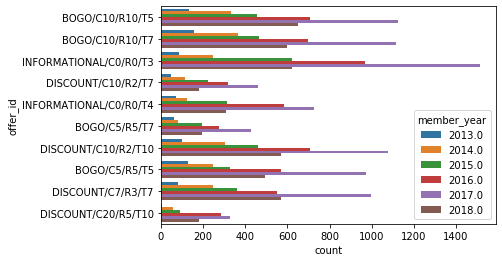

In [17]:
ax = sns.countplot(y="offer_id", hue="member_year", data=test2)

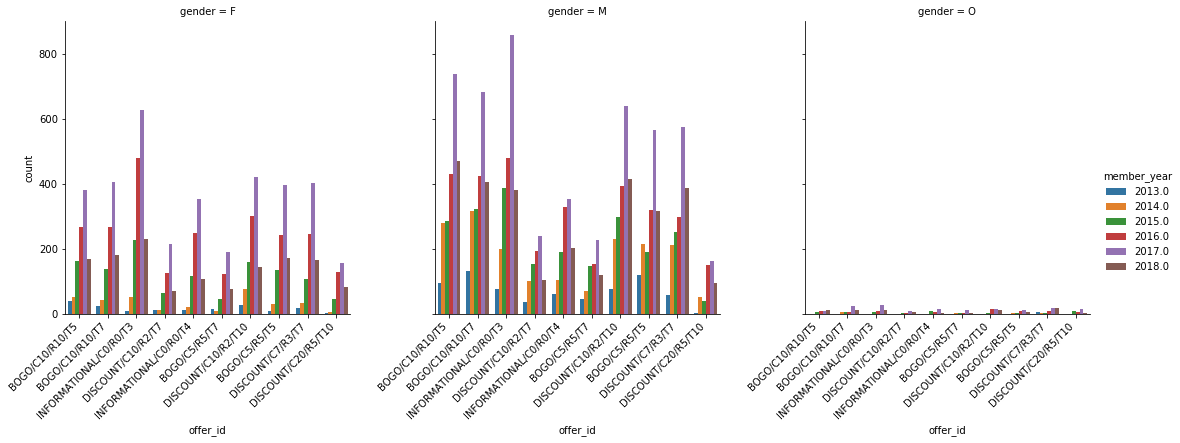

In [18]:
ax = sns.catplot(x="offer_id", hue="member_year", col="gender",
                data=test2, kind="count")
ax.set_xticklabels(rotation=45, horizontalalignment='right')

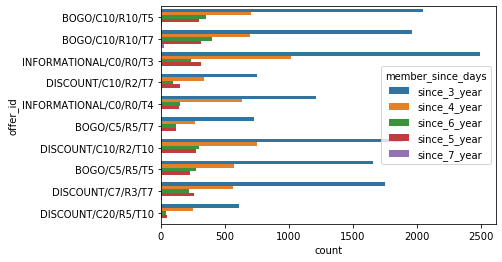

In [19]:
ax = sns.countplot(y="offer_id", hue="member_since_days", data=test2)

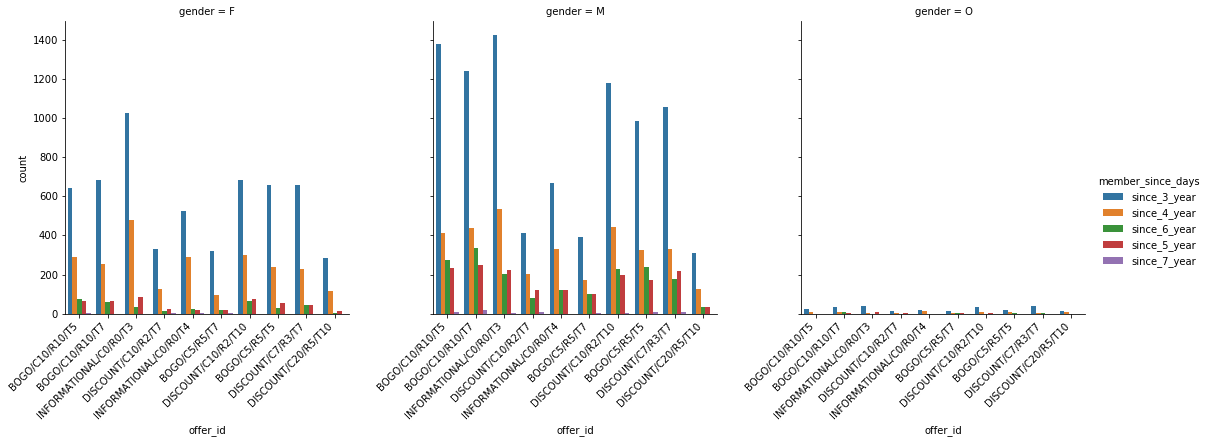

In [20]:
ax = sns.catplot(x="offer_id", hue="member_since_days", col="gender",
                data=test2, kind="count")
ax.set_xticklabels(rotation=45, horizontalalignment='right')

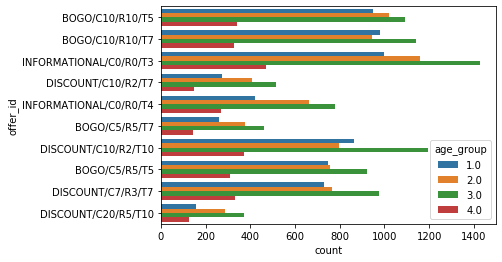

In [21]:
ax = sns.countplot(y="offer_id", hue="age_group", data=test2)

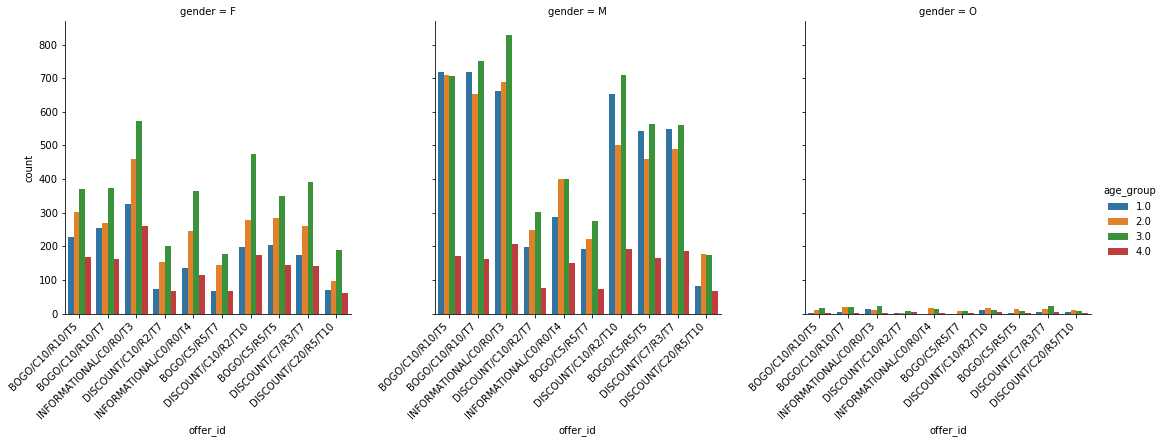

In [22]:
ax = sns.catplot(x="offer_id", hue="age_group", col="gender",
                data=test2, kind="count")
ax.set_xticklabels(rotation=45, horizontalalignment='right')

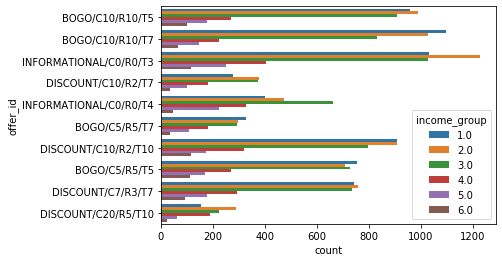

In [23]:
ax = sns.countplot(y="offer_id", hue="income_group", data=test2)

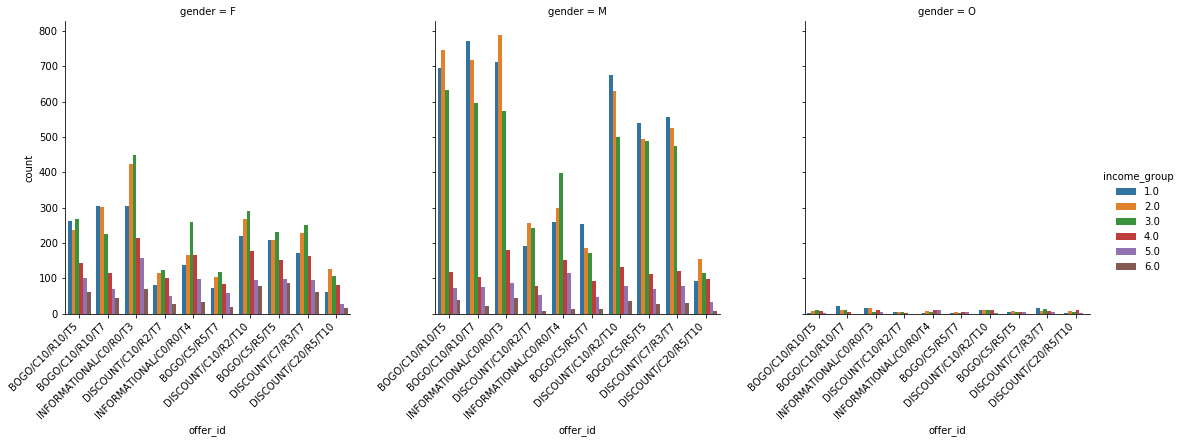

In [24]:
ax = sns.catplot(x="offer_id", hue="income_group", col="gender",
                data=test2, kind="count")
ax.set_xticklabels(rotation=45, horizontalalignment='right')

In [25]:
test2.groupby(['offer_id']).sum()

,time_received,age,income,member_year,age_group,income_group,reward,difficulty,duration,time_viewed,time_completed,time_of_expiry,successful_offer,tried_offer,failed_offer,time_spent,amount_spent,spent_during_offer
offer_id,,,,,,,,,,,,,,,,,,
BOGO/C10/R10/T5,1021272.0,171963.0,197063000.0,6867401.0,7639.0,8230.0,34060.0,34060.0,17030.0,1079670.0,506604.0,1503100.0,1268,2138,0,1216872.0,34666.31,3406
BOGO/C10/R10/T7,1014528.0,171698.0,188226000.0,6842944.0,7609.0,7669.0,33940.0,33940.0,23758.0,1081704.0,529356.0,1503207.0,1250,2144,0,1235664.0,34149.11,3394
BOGO/C5/R5/T5,788184.0,139871.0,165119000.0,5526607.0,6278.0,6956.0,13705.0,13705.0,13705.0,835182.0,624714.0,1169269.0,1511,1230,0,930258.0,33216.51,2741
BOGO/C5/R5/T7,359112.0,66025.0,76355000.0,2496084.0,2963.0,3267.0,6190.0,6190.0,8666.0,396960.0,383898.0,541370.0,910,328,0,432660.0,15637.94,1238
DISCOUNT/C10/R2/T10,918912.0,167456.0,189691000.0,6496394.0,7516.0,7955.0,6444.0,32220.0,32220.0,981042.0,1067034.0,1371116.0,2300,922,0,1101534.0,37428.99,3222
DISCOUNT/C10/R2/T7,387984.0,71357.0,83116000.0,2705703.0,3218.0,3578.0,2684.0,13420.0,9394.0,429048.0,452784.0,578754.0,1015,327,0,465840.0,18734.01,1342
DISCOUNT/C20/R5/T10,277584.0,51979.0,60439000.0,1905590.0,2362.0,2625.0,4725.0,18900.0,9450.0,312690.0,336228.0,412376.0,648,297,0,339108.0,17872.18,945
DISCOUNT/C7/R3/T7,823824.0,145927.0,167896000.0,5649874.0,6518.0,7088.0,8406.0,19614.0,19614.0,873642.0,897108.0,1215073.0,2147,655,0,968448.0,32265.37,2802
INFORMATIONAL/C0/R0/T3,1255152.0,211697.0,240587000.0,8178270.0,9482.0,10122.0,0.0,0.0,12168.0,1339248.0,0.0,1836332.0,0,4056,0,1506324.0,50404.64,4056


[Text(0, 0, 'BOGO/C10/R10/T5'),
 Text(0, 0, 'BOGO/C10/R10/T7'),
 Text(0, 0, 'INFORMATIONAL/C0/R0/T3'),
 Text(0, 0, 'DISCOUNT/C10/R2/T7'),
 Text(0, 0, 'INFORMATIONAL/C0/R0/T4'),
 Text(0, 0, 'BOGO/C5/R5/T7'),
 Text(0, 0, 'DISCOUNT/C10/R2/T10'),
 Text(0, 0, 'BOGO/C5/R5/T5'),
 Text(0, 0, 'DISCOUNT/C7/R3/T7'),
 Text(0, 0, 'DISCOUNT/C20/R5/T10')]

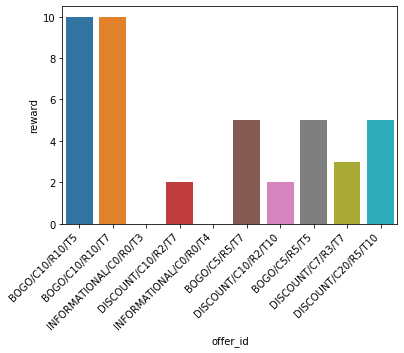

In [5]:
ax = sns.barplot(y="reward", x="offer_id", data=test2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [17]:
total_tried_offers.groupby('offer_type').count()

,person,value,time_received,type,offer_id,gender,age,income,member_year,member_since_days,...,duration,time_viewed,time_completed,time_of_expiry,successful_offer,tried_offer,failed_offer,time_spent,amount_spent,spent_during_offer
offer_type,,,,,,,,,,,,,,,,,,,,,
bogo,84276,84276,84276,84276,84276,84276,84276,84276,84276,84276,...,84276,84276,55937,84276,84276,84276,84276,84055,84055,84276
discount,70854,70854,70854,70854,70854,70854,70854,70854,70854,70854,...,70854,70854,63109,70854,70854,70854,70854,70636,70636,70854
informational,34808,34808,34808,34808,34808,34808,34808,34808,34808,34808,...,34808,34808,0,34808,34808,34808,34808,34706,34706,34808


In [19]:
starbucks.succ_tried_offers.groupby('offer_type').count()

,person,value,time_received,type,offer_id,gender,age,income,member_year,member_since_days,...,duration,time_viewed,time_completed,time_of_expiry,successful_offer,tried_offer,failed_offer,time_spent,amount_spent,spent_during_offer
offer_type,,,,,,,,,,,,,,,,,,,,,
bogo,10779,10779,10779,10779,10779,10779,10779,10779,10779,10779,...,10779,10779,5629,10779,10779,10779,10779,10779,10779,10779
discount,8311,8311,8311,8311,8311,8311,8311,8311,8311,8311,...,8311,8311,7284,8311,8311,8311,8311,8311,8311,8311
informational,6187,6187,6187,6187,6187,6187,6187,6187,6187,6187,...,6187,6187,0,6187,6187,6187,6187,6187,6187,6187


In [23]:
test_channels = starbucks.encode_categorical_variables(starbucks.succ_tried_offers)
test_channels.shape

(25277, 45)

In [56]:
test_channels[(test_channels['offer_informational'] == 1)]['person'].count()

6187

## Conclusion

### Q1. Identify which groups of people are most responsive to each type of offer.

Members who joined one to two years back relative to 2018, seem to be equally responsive to each offer while the trend decreases with new members (1 year or less than 1 year) and old members (more than two years).

Males in age group of 1 (< 38 years) and 3 (between 55 years and 73 years) dominated across almost all the offers while females showed domination in group 3 (between 55 years and 73 years).

Males in income groups 2 (45000 <= income < 60000) and 3 (60000 <= income < 75000) showed domination for informational discounts.

### Q2. How best to present each type of offer?

| Offer type | Web | Mobile | Email | Social | OFFER_TOTAL |
| - | - | - | - | - | - |
| Bogo | 7385 | 10779 | 10779 | 9541 | 38484 |
| Discount | 8311 | 7366 | 8311 | 6024 | 30012 |
| Informational | 2131 | 6187 | 6187 | 4056 | 18561 |
| **TOTAL** | 17827 | 24332 | 25227 | 19621 |

### Q3. How many people across different categories actually completed the transaction in the offer window?

Approximately 12.8% of the total population for offer type BOGO completed the transaction in the offer window; 12% for offer type discount and 18% for informational type.

### Q4. Which individual attributes contributed the most during the offer window?
 
The top three that contributed the most are as follows:
    1. Income
    2. Age
    3. Start year of membership
    
## Results
We also tried to build a model to predict the amount spent based on individual input and offer type.

Final results on the different trained models are:

| Model | R2 score |
| - | - |
| SVM Regressor | 0.041794040197025595 |
| Random Forest Regressor | -0.008060879289752076 |
| Random Forest Regressor with Grid Search | 0.059339282853018704 |

The final R2 score is better than that obtained with a SVM and with the default Random Forest. 

As part of an improvement task, I will try out PCA and SVM Regressor with better hyperparameters.
